In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

DATADIR = "PetImages"
CATEGORIES = ["Dog", "Cat"]

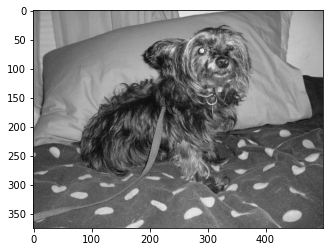

In [2]:
for category in CATEGORIES:
    path = os.path.join(DATADIR, category)  #path to cats or dogs directory
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break
    break

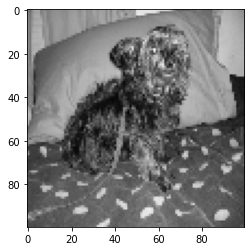

In [5]:
IMG_SIZE = 50

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [10]:
training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)  #path to cats or dogs directory
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass

create_training_data()

In [11]:
print(len(training_data))

24946


In [12]:
import random

random.shuffle(training_data)

In [14]:
X = []
y = []

In [15]:
for features, label in training_data:
    X.append(features)
    y.append(label)
    
    
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [17]:
 import pickle
    
pickle_out = open("X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [ ]:
#read

pickle_in = open("X.pickle", "rb")
X = pickle.load(pickle_in)